1. Implement a FA function in R/Python based on the PCA function you implemented in HW05. User can pass the dataset and specify the desired number of factors.

a. (15%) Necessary outputs are:

• the loading matrix A;

• the factor matrix F;

• the communality vector of h2; 

• the uniqueness vector of 𝜓𝑖; and

• the vector of the proportions of total variance contributed by the ith factor.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [ ]:

def fa_function(X, num_feat):

  x_std = StandardScaler().fit_transform(X)
  features = x_std.T 
  covariance_matrix = np.cov(features)
  eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
  sel_eig_vals = eig_vals[:num_feat]
  eig_vals_diag = np.zeros((eig_vals.shape[0], eig_vals.shape[0]), float) 
  np.fill_diagonal(eig_vals_diag, eig_vals) 
  eig_vals_diagsqrt = np.sqrt(eig_vals_diag)
  All_T = eig_vals_diag @ eig_vecs
  All = All_T.T
  X_variance = np.diag(np.diag(All_T @ All))
  eig_vals_diag = np.zeros((num_feat, num_feat), float) 
  np.fill_diagonal(eig_vals_diag, eig_vals[:num_feat]) 
  eig_vals_diagsqrt = np.sqrt(eig_vals_diag)
  A_T = eig_vecs[:, :num_feat] @ eig_vals_diagsqrt
  A = A_T.T
  psi = X_variance - A_T @ A
  inverse_psi = np.linalg.inv(psi)
  inner = np.linalg.inv(A @ (inverse_psi) @ (A_T))
  F = X @ inverse_psi @ (A_T) @ (inner)
  communality_vector = np.diag(A_T @ A)
  return F, A, communality_vector, psi, eig_vals, eig_vecs, sel_eig_vals


(10%) Apply your FA function to the AutoMPG dataset and generate the necessary outputs given 2 factors are selected. Compare with the PCA results in HW05-EX4 and discuss.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/homework_6/auto-mpg.csv', sep=";", header=None, names=['Mpg', 'Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin', 'Car name'])


df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# X is feature vectors
X = df [['Mpg', 'Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin']]
X

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1
388,44.0,4,97.0,52,2130,24.6,82,2
389,32.0,4,135.0,84,2295,11.6,82,1
390,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
F, A, communality_vector, psi, eig_vals, eig_vecs, sel_eig_vals = fa_function(X, 2)


In [ ]:
sum_vals = eig_vals.sum()
total_val = 0
for i in range(0,len(sel_eig_vals)):
  print("Factor",i+1,"contributes",format(sel_eig_vals[i]*100/sum_vals,'2.2f'),"%")
  total_val = sel_eig_vals[i]*100/sum_vals + total_val

print("Total factors contribution:",format(total_val,'2.2f'),"%" )

Factor 1 contributes 67.20 %
Factor 2 contributes 11.80 %
Total factors contribution: 78.99 %


Comparison to HW05-EX4

Using only 1 factor it was possible explain more about the data then 1 principal component, so for this case. However, both algoritms had a good processing time and they were fast in executing the features. In FA we need to set the how many factors we want, so for examples with more variables [X] this can be a exausthing process, since it might execute over again changing the number of the factor.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


it was necessary 2 components for 50% variance
it was necessary 3 components for 60% variance
it was necessary 4 components for 70% variance
it was necessary 5 components for 80% variance
it was necessary 6 components for 90% variance


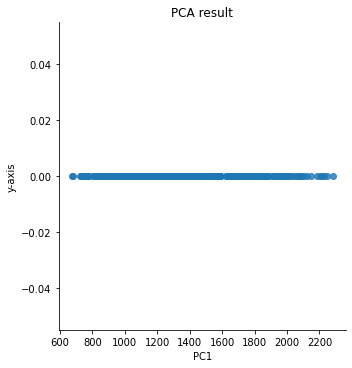

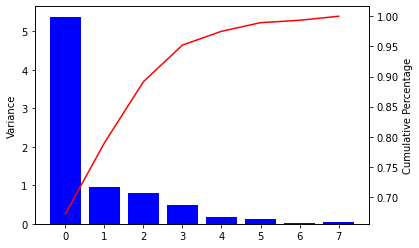

In [ ]:
from sklearn.preprocessing import StandardScaler

def plot_eigvals(eigVals): 
  count = 0
  x_axis=[]
  y = []
  y_culmulated = []
  total_val = eigVals.sum() 
  y_culmulated.append(eigVals[0]/total_val) 
  for i in range(0,len(eigVals)):
    x_axis.append(i) 
    y.append(eigVals[i]/total_val) 

    if i !=0 :
      y_culmulated.append((eigVals[i]/total_val+y_culmulated[i-1]))      

      if y_culmulated[-1] > 0.5 and count == 0:
        print("it was necessary " + str(len(y_culmulated))+" components for 50% variance")
        count = 1
      
      elif y_culmulated[-1] > 0.6 and count == 1:
        print("it was necessary " + str(len(y_culmulated))+" components for 60% variance")
        count = 2

      elif y_culmulated[-1] > 0.7 and count == 2:
        print("it was necessary " + str(len(y_culmulated))+" components for 70% variance")
        count = 3
  
      elif y_culmulated[-1] > 0.8 and count == 3:
        print("it was necessary " + str(len(y_culmulated))+" components for 80% variance")
        count = 4  

      elif y_culmulated[-1] > 0.9 and count == 4:
        print("it was necessary " + str(len(y_culmulated))+" components for 90% variance")
        count = 5

  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx() 


  ax2.set_xlabel("PC numbers")
  ax1.set_ylabel("Variance")
  ax1.bar(x_axis, eigVals, color="blue")


  ax2.set_ylabel("Cumulative Percentage") 
  ax2.plot(x_axis,y_culmulated , color="red")


def onedin_plot(projected_X):
  result = pd.DataFrame(projected_X, columns=['PC1'])
  result['y-axis'] = 0.0
  sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False)

  # title
  plt.title('PCA result')

  


def pca_function(X, isCorrMX):
  features = X.T
  if isCorrMX == True:
    matrix = np.corrcoef(features)
  else:
    matrix = np.cov(features)

  eig_vals, eig_vecs = np.linalg.eig(matrix)
  eig_vals[0]/sum(eig_vals)
  projected_X = X.dot(eig_vecs.T[0])

  onedin_plot(projected_X)
  plot_eigvals(eig_vals)


  return matrix, eig_vals, eig_vecs


matrix, eig_vals, eig_vecs = pca_function(X, True)